In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def counts_to_percent_seen(pts_seen, n_total=200):
    n_fruit = len(pts_seen[0])
    pct_seen = np.stack(pts_seen) / n_total
    return pd.DataFrame({
        'any': np.sum(pct_seen > 0, axis=1)/n_fruit,
        '25%': np.sum(pct_seen >= 0.25, axis=1)/n_fruit,
        '50%': np.sum(pct_seen >= 0.25, axis=1)/n_fruit,
        '75%': np.sum(pct_seen >= 0.75, axis=1)/n_fruit,
    })

In [2]:
with open('data/point_scanning.json') as f:
    data = json.load(f)

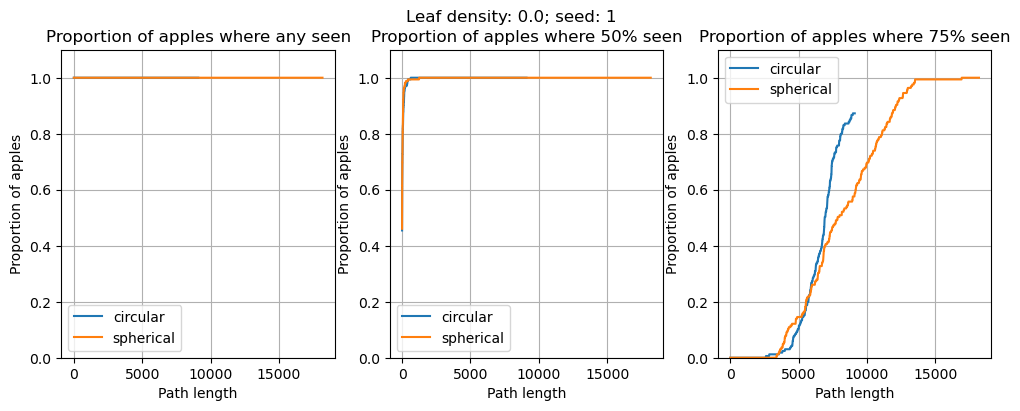

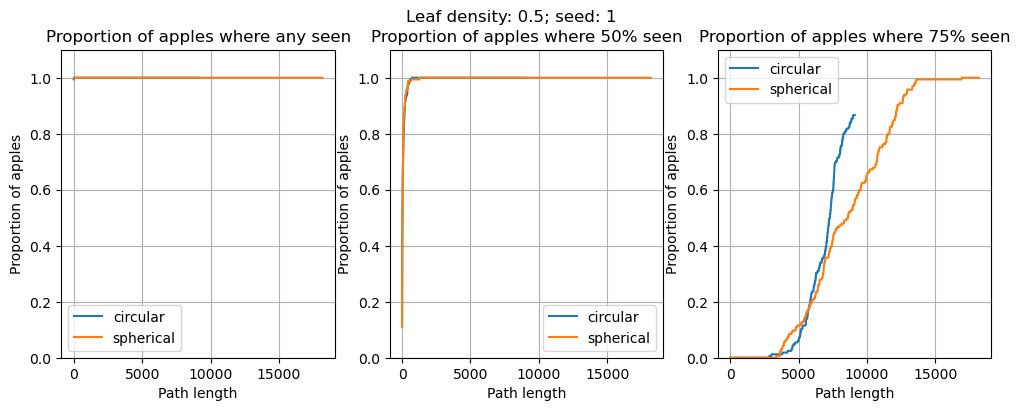

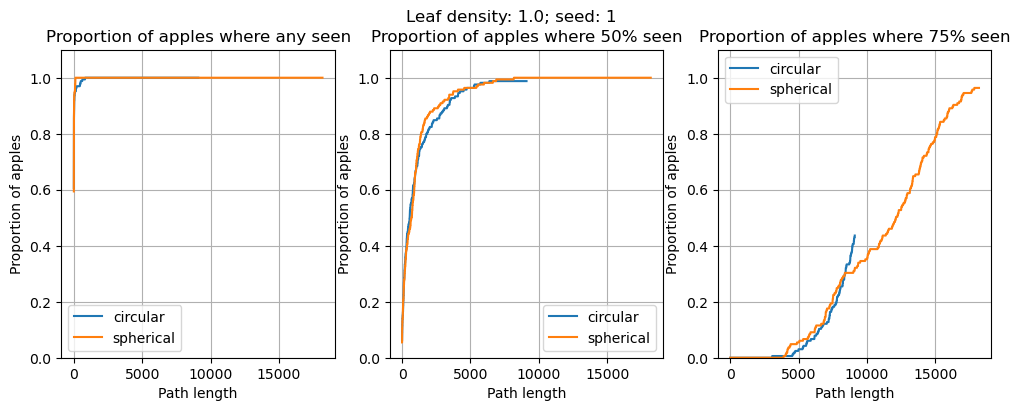

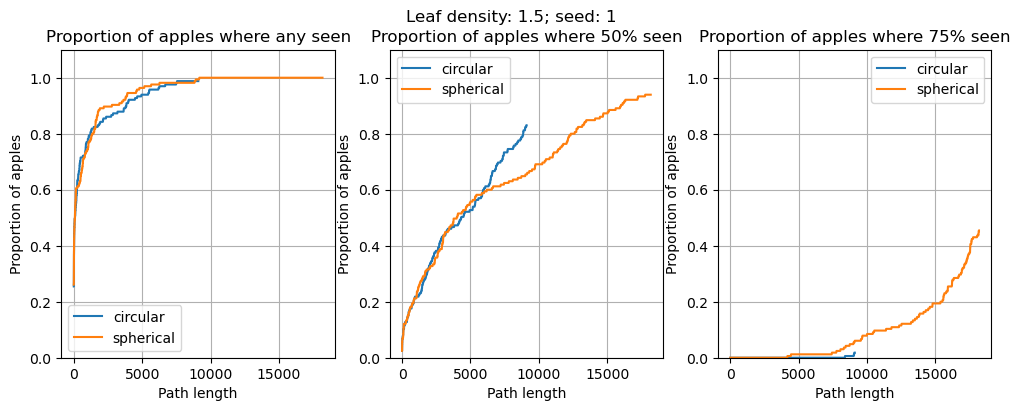

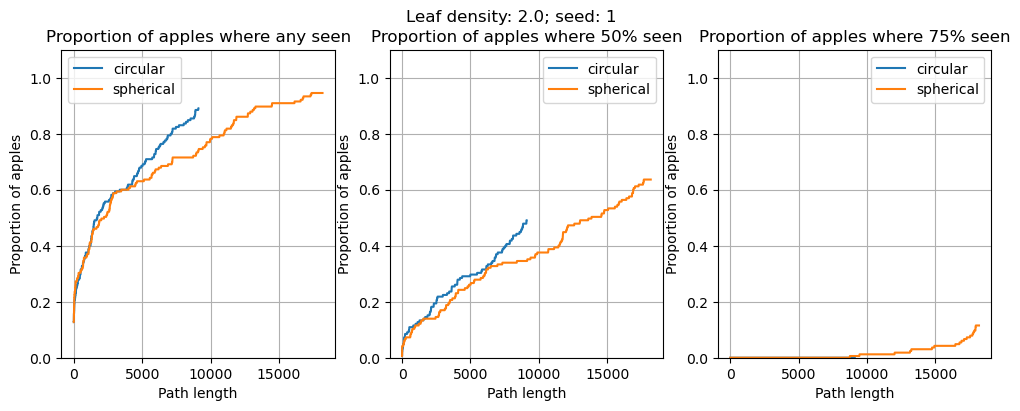

In [3]:
for scenario in data:
    params = scenario['parameters']
    
    fig, axes = plt.subplots(1,3, figsize=(12, 4))  # Create a figure with 3 subplots    
    plt.suptitle('Leaf density: {}; seed: {}'.format(params['tree_params']['leaf_scale'], params['tree_params']['seed']))
    
    columns = ['any','50%','75%']
    
    for attempt in scenario['attempts']:
        
        att_params = attempt['orbit']
        trace = pd.json_normalize(attempt['result'])
        trace['distance_from_last'] = np.stack(trace['distance_from_last.joint_distances']).sum(axis=1) + trace['distance_from_last.rotation_distance'] + trace['distance_from_last.translation_distance']
        trace['distance'] = trace['distance_from_last'].cumsum()
        pct_seen = counts_to_percent_seen(trace['pts_seen'])
        
        for (ax,col) in zip(axes,columns):
            ax.plot(trace['distance'], pct_seen[col], label=att_params['type'])
        
    for (ax,col) in zip(axes,columns):
        ax.set_ylim(0,1.1)
        ax.grid()
        ax.set_xlabel('Path length')
        ax.set_ylabel('Proportion of apples')
        ax.set_title('Proportion of apples where {} seen'.format(col))
        ax.legend()